# Introducción al Análisis Exploratorio de Datos con Pandas

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

## Temario

- Visualizaciones
    - Examinando la distribucion de una variables
        - Histograma **(hecho)**
        - Density Plot **(hecho)**
    - Explorando relacion entre variables
        - Line Plot
        - Scatter Plot **(hecho)**
        - Live plot with Y axes
        - Overlaid Histogram **(hecho)**
        - Corralation Matrix Plot
        - Heatmap
    - Comparando Grupos o categorias
        - Bar Plot **(hecho)**
        - Stacked Bar Plot **(a documentacion)**
        - Grouped Bar Plot **(hecho)**
        - Box Plot **(hecho)**
- Concatenacion y Join (Merge) de data frames.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [21]:
#cp1252
projects_2017 = pd.read_csv('../data/kickstarter-projects/ks-projects-201801.csv')
projects_2017.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [22]:
print(projects_2017.shape)
# veamos la informacion general del dataframe.
print(projects_2017.info())

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [24]:
main_categories = projects_2017['main_category']

In [27]:
print(main_categories.value_counts())

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In [38]:
states = projects_2017['state']
print(states.value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


## Revisando Calidad de los datos

In [33]:
projects_2017.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

In [34]:
projects_2017.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [37]:
# metricas generales de las columnas o features del data frame que podemos analizar via .describe
projects_2017.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Analizando la distribucion de variables

In [111]:
# creamos nuevas columnas en escala logaritmica
projects_2017["pledged_log"] = np.log(projects_2017["pledged"]+ 1)
projects_2017["goal_log"] = np.log(projects_2017["goal"]+ 1)
projects_2017["usd_pledged_real_log"] = np.log(projects_2017["usd_pledged_real"]+ 1)
projects_2017["usd_goal_real_log"] = np.log(projects_2017["usd_goal_real"]+ 1)

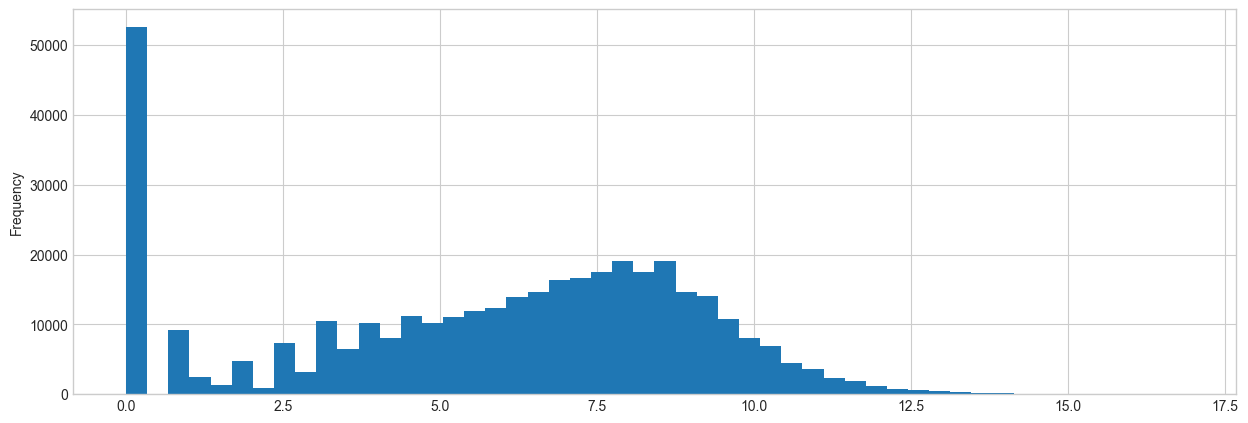

In [131]:
projects_2017["pledged_log"].plot.hist(bins=50)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Pledged Log')

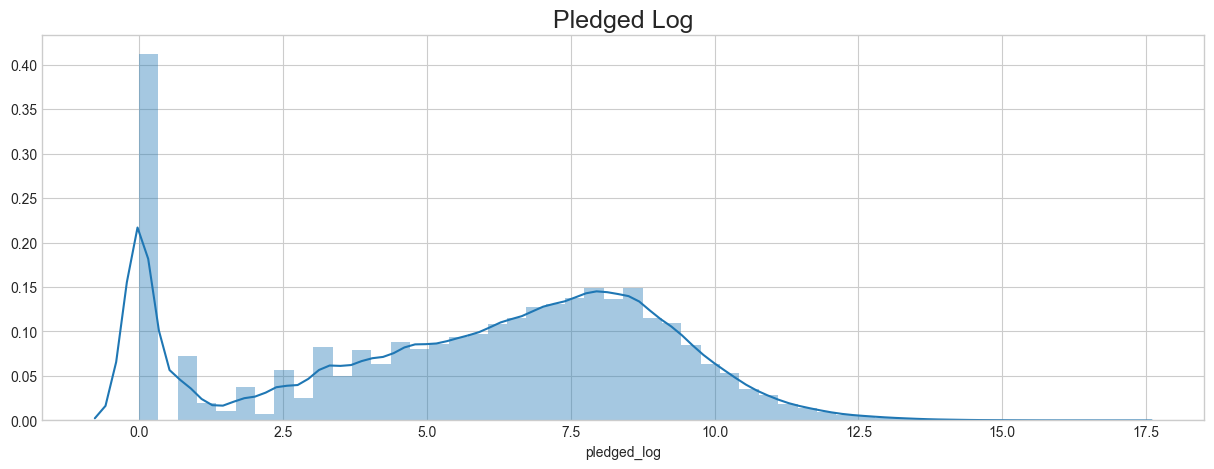

In [113]:
g = sns.distplot(projects_2017["pledged_log"])
g.set_title("Pledged Log", fontsize=18)

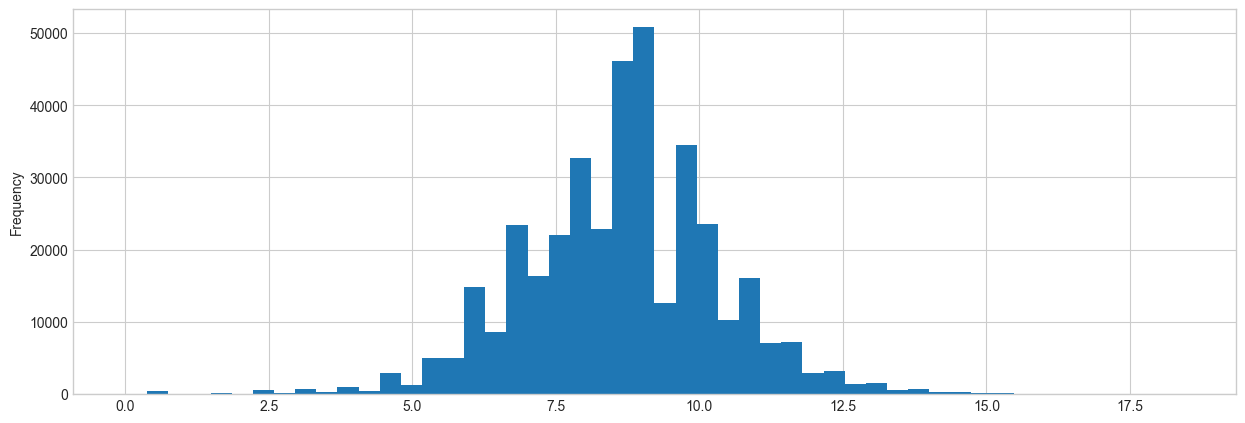

In [114]:
projects_2017["goal_log"].plot.hist(bins=50)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Goal Log')

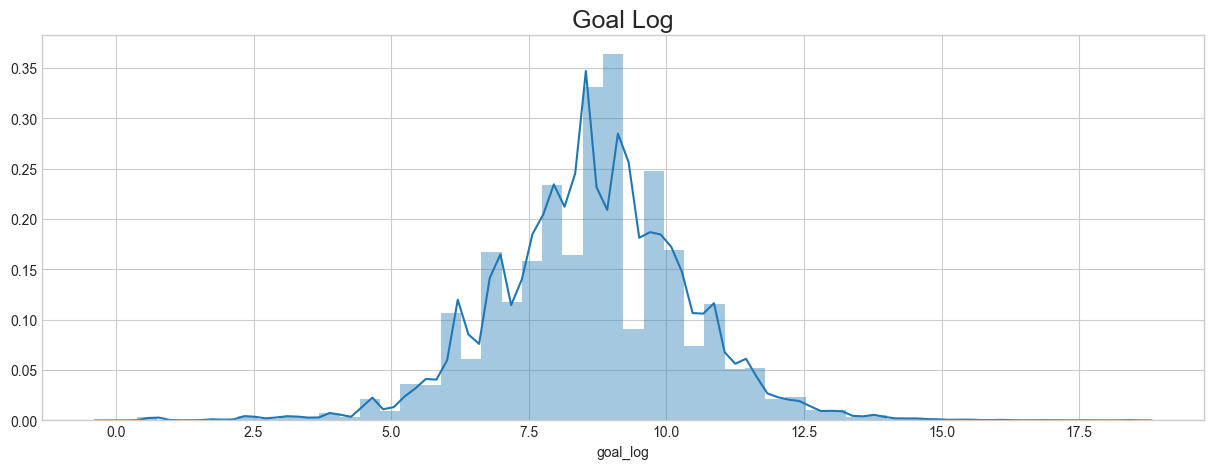

In [115]:
g = sns.distplot(projects_2017["goal_log"])
g.set_title("Goal Log", fontsize=18)

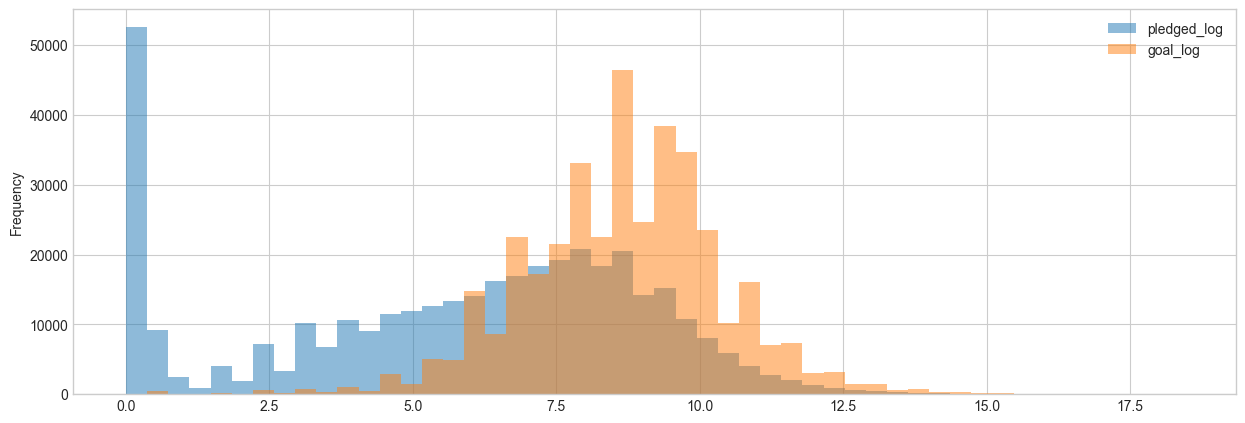

In [116]:
# ambos histogramas juntos
projects_2017[["pledged_log","goal_log"]].plot.hist(bins=50,alpha=0.5)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Pledged x Goal cross distribuition')

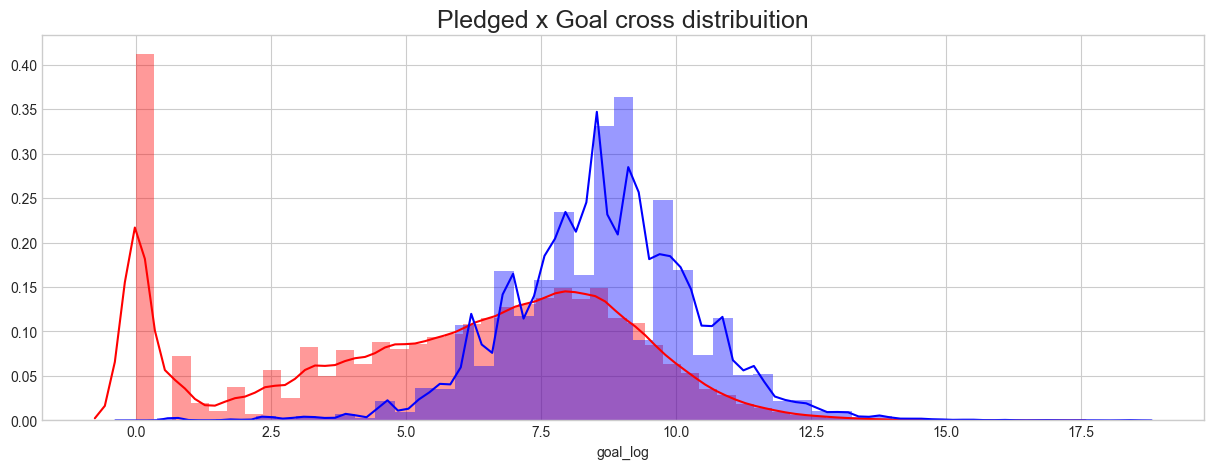

In [117]:
g = sns.distplot(projects_2017['pledged_log'], color='r')
g = sns.distplot(projects_2017['goal_log'], color='b')
g.set_title("Pledged x Goal cross distribuition", fontsize=18)

In [138]:
failed = projects_2017[projects_2017["state"] == "failed"]
success = projects_2017[projects_2017["state"] == "successful"]

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Goal Distribuition of Failed vs Successful Projects')

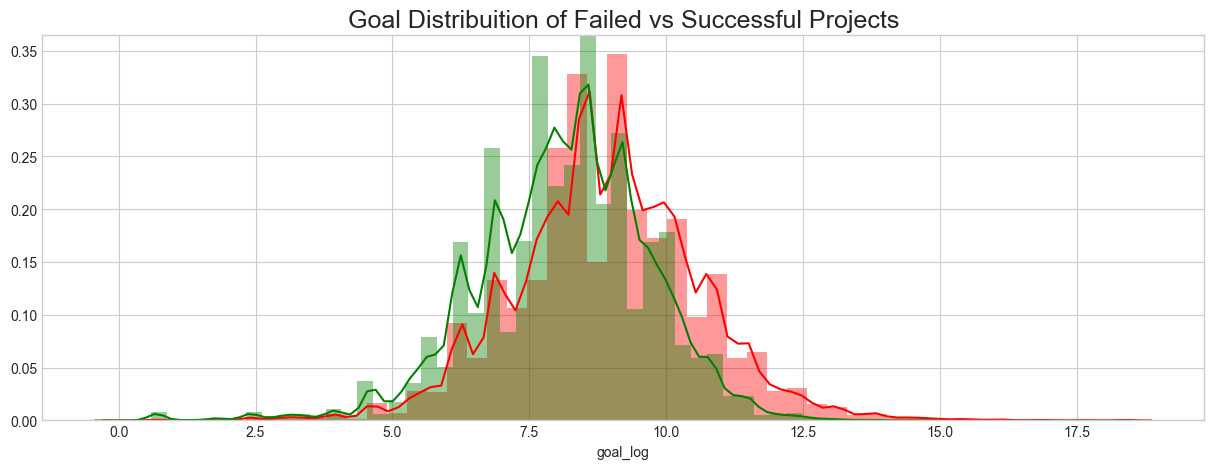

In [139]:
g = sns.distplot(failed['goal_log'], color='r')
g = sns.distplot(success['goal_log'], color='g')
g.set_title("Goal Distribuition of Failed vs Successful Projects", fontsize=18)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Pledge Distribuition of Failed vs Successful Projects')

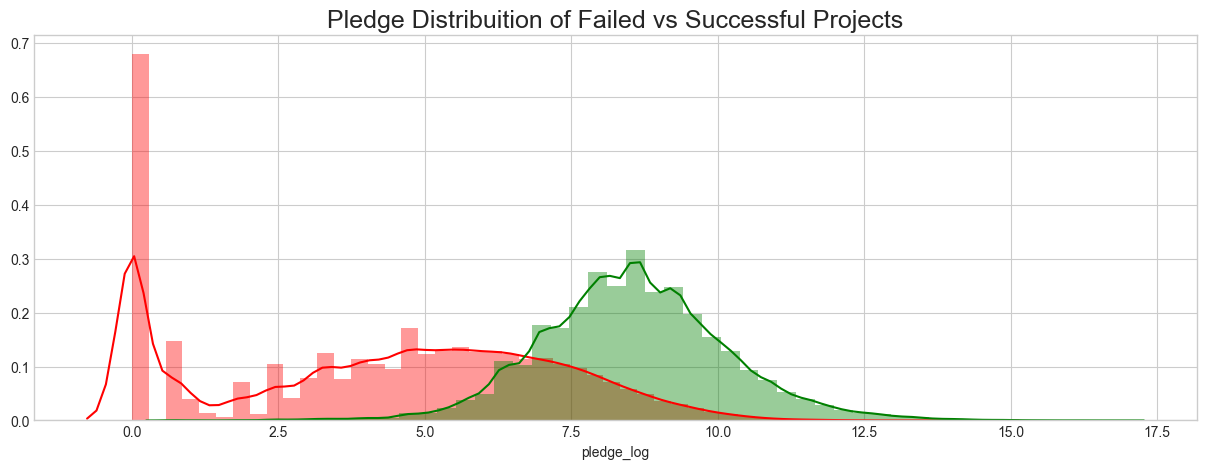

In [140]:
g = sns.distplot(failed['pledged_log'], color='r')
g = sns.distplot(success['pledge_log'], color='g')
g.set_title("Pledge Distribuition of Failed vs Successful Projects", fontsize=18)

## Analizando por Estado del proyecto

In [128]:
print("Calculando la media por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal_log", "pledged_log"].mean(),2))

Calculando la media por estado final del proyecto
            goal_log  pledged_log
state                            
canceled        9.18         4.08
failed          8.90         4.23
live            8.86         5.11
successful      8.13         8.56
suspended       8.32         4.07
undefined       8.15         5.24


In [129]:
print("Calculando el desvio standard por estado final del proyecto")
print(round(projects_2017.groupby(["state"])["goal_log", "pledged_log"].std(),2))

Calculando el desvio standard por estado final del proyecto
            goal_log  pledged_log
state                            
canceled        1.85         3.34
failed          1.70         2.93
live            1.84         3.40
successful      1.57         1.59
suspended       2.46         3.81
undefined       0.65         3.40


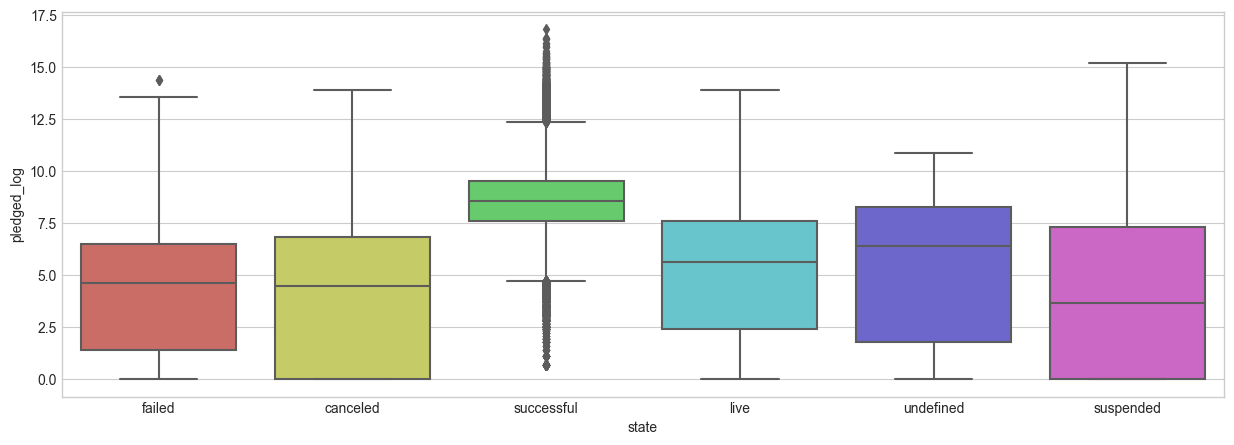

In [127]:
sns.boxplot(x="state", y="pledged_log", 
                     data=projects_2017, palette="hls")

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

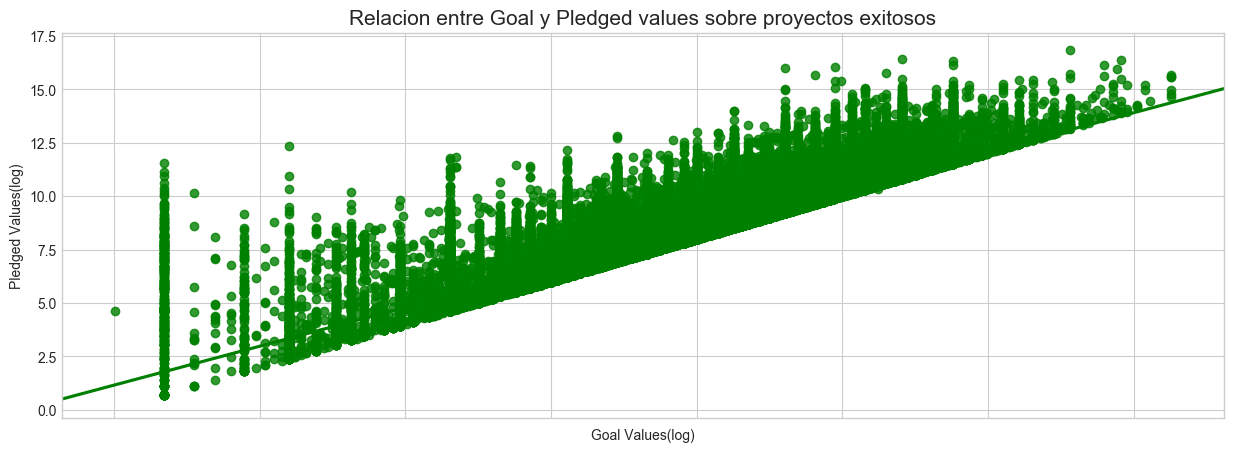

In [146]:
g = sns.regplot(x="goal_log", y="pledge_log", 
                    data=success, color="g")
g.set_title("Relacion entre Goal y Pledged values sobre proyectos exitosos", fontsize=15)
g.set_xlabel("Goal Values(log)")
g.set_ylabel("Pledged Values(log)")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

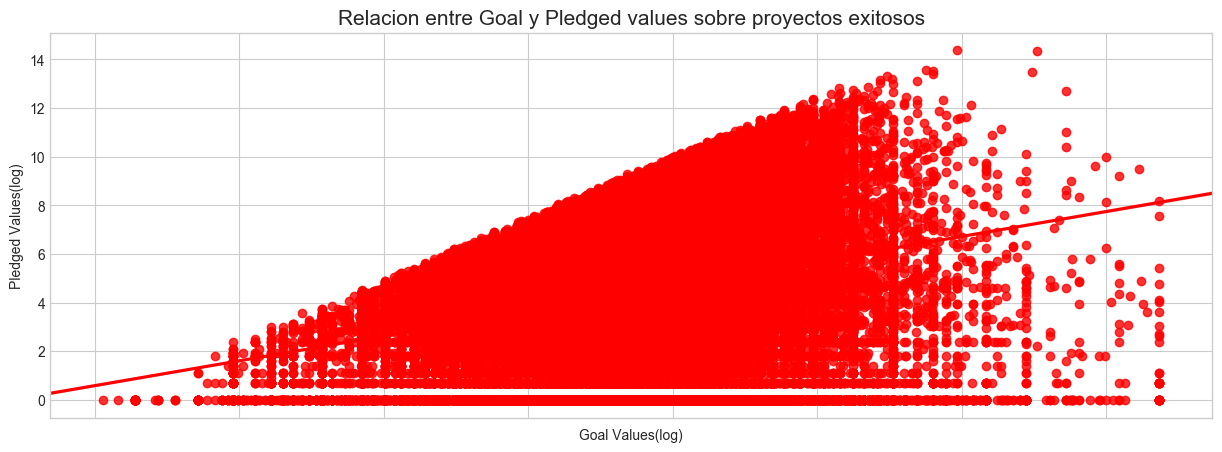

In [147]:
g = sns.regplot(x="goal_log", y="pledge_log", 
                    data=failed, color="r")
g.set_title("Relacion entre Goal y Pledged values sobre proyectos exitosos", fontsize=15)
g.set_xlabel("Goal Values(log)")
g.set_ylabel("Pledged Values(log)")
g.set_xticklabels(g.get_xticklabels(),rotation=90)

## Principales Categorias

In [177]:
main_categories_counts = projects_2017["main_category"].value_counts()
print(main_categories_counts)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


Text(0,0.5,'Name of Category')

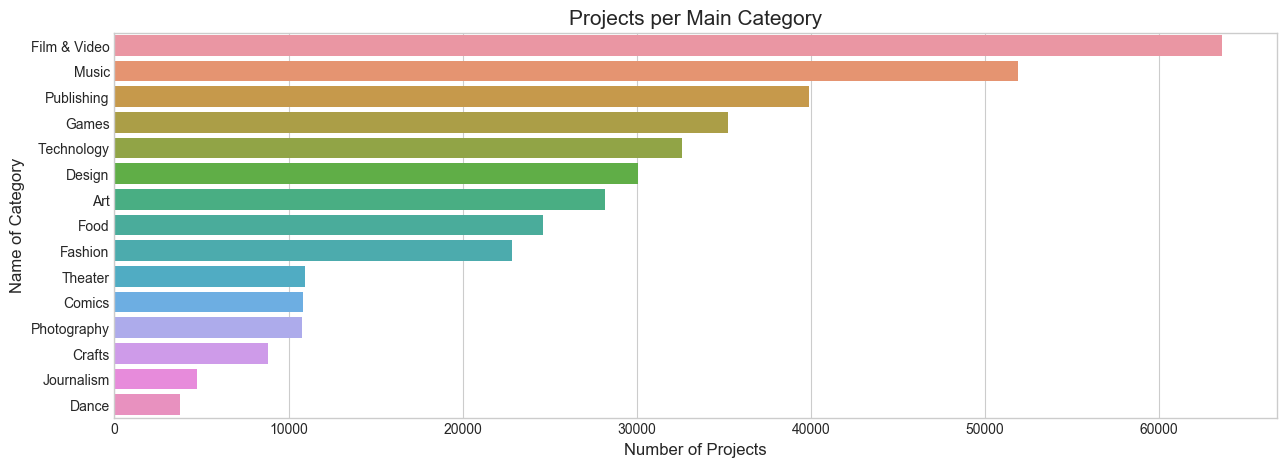

In [182]:
g = sns.barplot(x=main_categories_counts.values, y=main_categories_counts.index, orient='h')
g.set_title("Projects per Main Category", fontsize=15)
g.set_xlabel("Number of Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

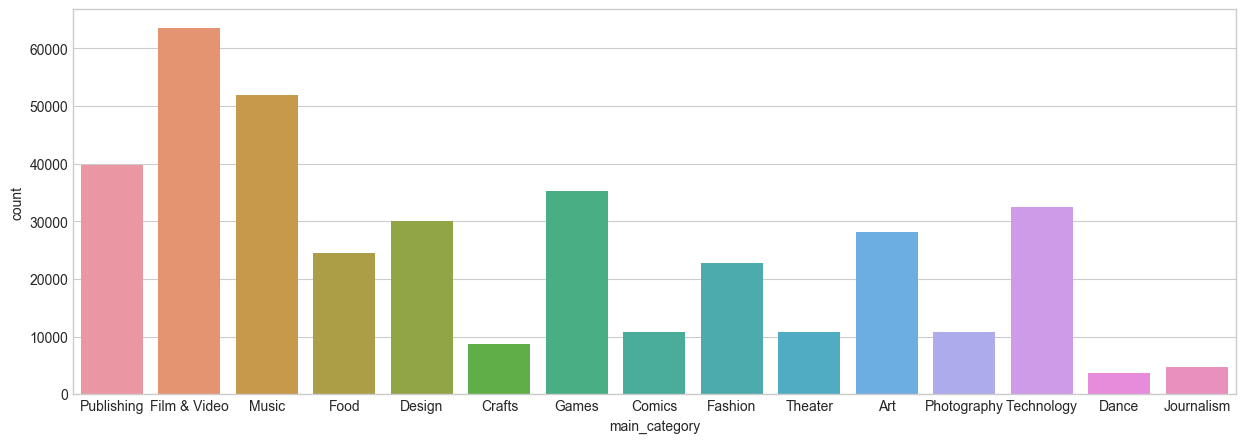

In [184]:
# simplificacion para hacerlo via seaborn con countplot
g = sns.countplot(x='main_category', data=projects_2017)

## Analisis por Categorias Exitosas y Fallidas

In [164]:
categories_failed = projects_2017[projects_2017["state"] == "failed"]["category"].value_counts()[:25]
print(categories_failed)

Product Design      10718
Documentary          8599
Food                 7119
Video Games          6942
Music                6201
Fiction              5875
Film & Video         5554
Fashion              5341
Nonfiction           5184
Apps                 4909
Apparel              4752
Shorts               4721
Technology           4409
Art                  4101
Tabletop Games       3878
Web                  3866
Children's Books     3850
Webseries            3450
Publishing           3412
Photography          3370
Crafts               2990
Hip-Hop              2857
Rock                 2746
Narrative Film       2605
Theater              2279
Name: category, dtype: int64


Text(0,0.5,'Name of Category')

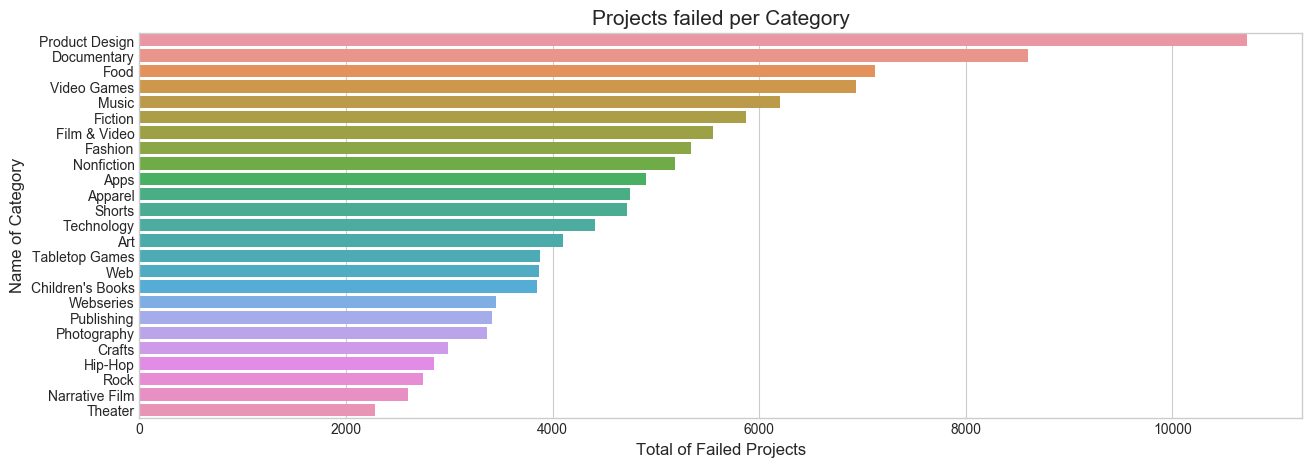

In [170]:
g = sns.barplot(x= categories_failed.values, y=categories_failed.index)
g.set_title("Projects failed per Category", fontsize=15)
g.set_xlabel("Total of Failed Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

In [173]:
categories_sucessful = projects_2017[projects_2017["state"] == "successful"]["category"].value_counts()[:25]
print(categories_sucessful)

Product Design      7962
Tabletop Games      7866
Shorts              6673
Music               6432
Documentary         5924
Theater             4405
Indie Rock          3618
Rock                3500
Art                 3385
Food                3297
Film & Video        3070
Country & Folk      2812
Comics              2506
Video Games         2386
Children's Books    2348
Fiction             2233
Nonfiction          2230
Fashion             2188
Narrative Film      2013
Photography         1876
Webseries           1698
Classical Music     1647
Publishing          1640
Illustration        1626
Comic Books         1614
Name: category, dtype: int64


Text(0,0.5,'Name of Category')

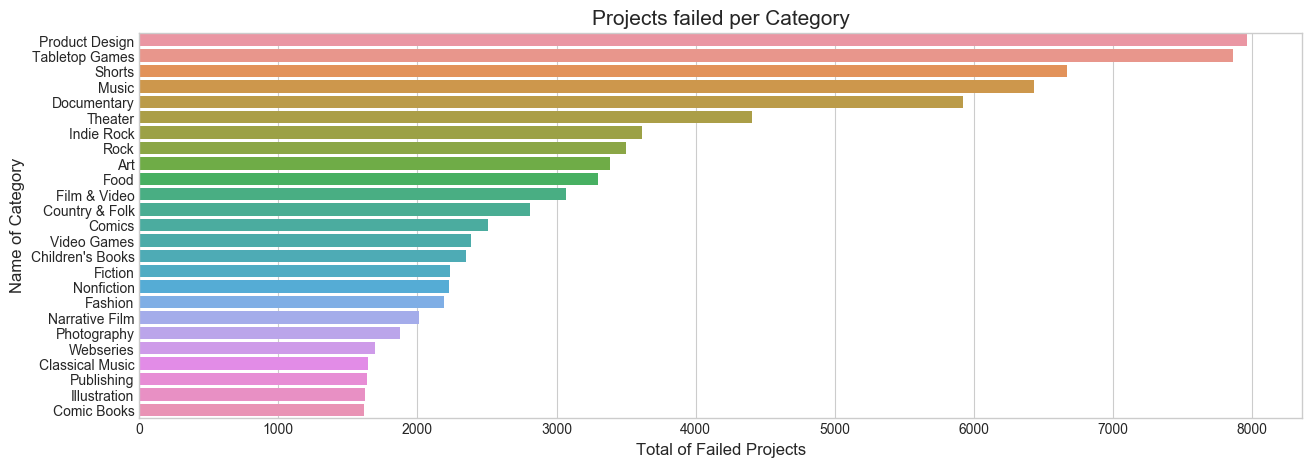

In [174]:
g = sns.barplot(x= categories_sucessful.values, y=categories_sucessful.index)
g.set_title("Projects Succesful per Category", fontsize=15)
g.set_xlabel("Total of Failed Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)

## Analisis Anual

In [198]:
# procesamiento de fechas de lanzamiento en mes y año
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.to_period("M")
projects_2017['launch_year'] = projects_2017['launched'].dt.to_period("Y")

state,canceled,failed,live,successful,suspended,undefined
launch_year,,,,,,
1970,6,0,0,0,1,0
2009,150,600,0,579,0,0
2010,926,4984,0,4593,16,0
2011,2144,11878,0,12171,44,0
2012,2631,20588,0,17892,52,2
2013,3690,21686,0,19415,58,2
2014,7418,38199,0,21107,270,751
2015,8927,44301,0,20971,721,2380
2016,7119,30526,2,18766,344,427


In [199]:
#cantidades por estado y año
pd.crosstab(projects_2017.launch_year, projects_2017.state)

state,canceled,failed,live,successful,suspended,undefined
launch_year,,,,,,
1970,6,0,0,0,1,0
2009,150,600,0,579,0,0
2010,926,4984,0,4593,16,0
2011,2144,11878,0,12171,44,0
2012,2631,20588,0,17892,52,2
2013,3690,21686,0,19415,58,2
2014,7418,38199,0,21107,270,751
2015,8927,44301,0,20971,721,2380
2016,7119,30526,2,18766,344,427


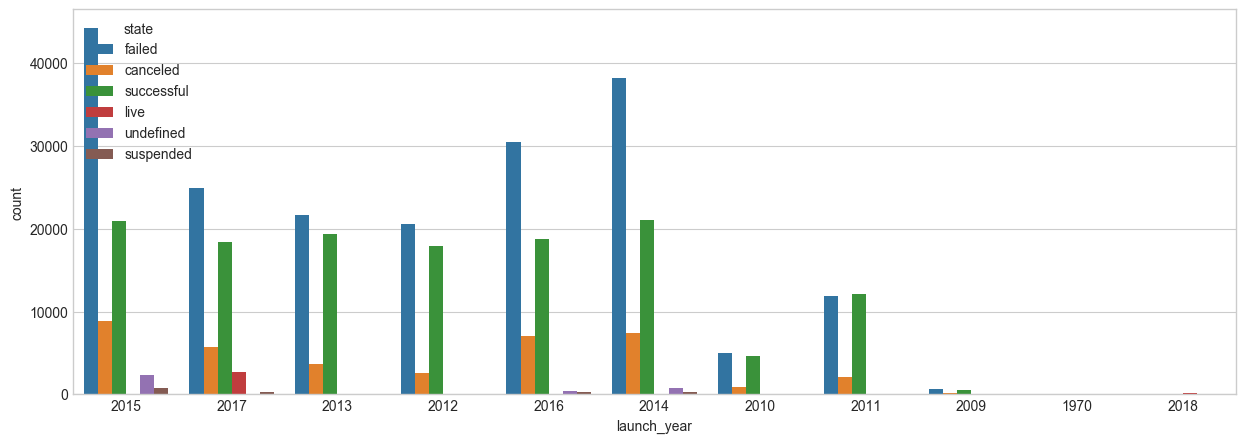

In [197]:
ax = sns.countplot(x="launch_year", hue="state", data=projects_2017)
# forzamos el order ya que no nos da el que queremos

In [ ]:
ax = sns.countplot(x="launch_year", hue="state", data=projects_2017)
# forzamos el order ya que no nos da el que queremos
# stacked
# al creador de seaborn no le gustan los stacked http://randyzwitch.com/creating-stacked-bar-chart-seaborn/
# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

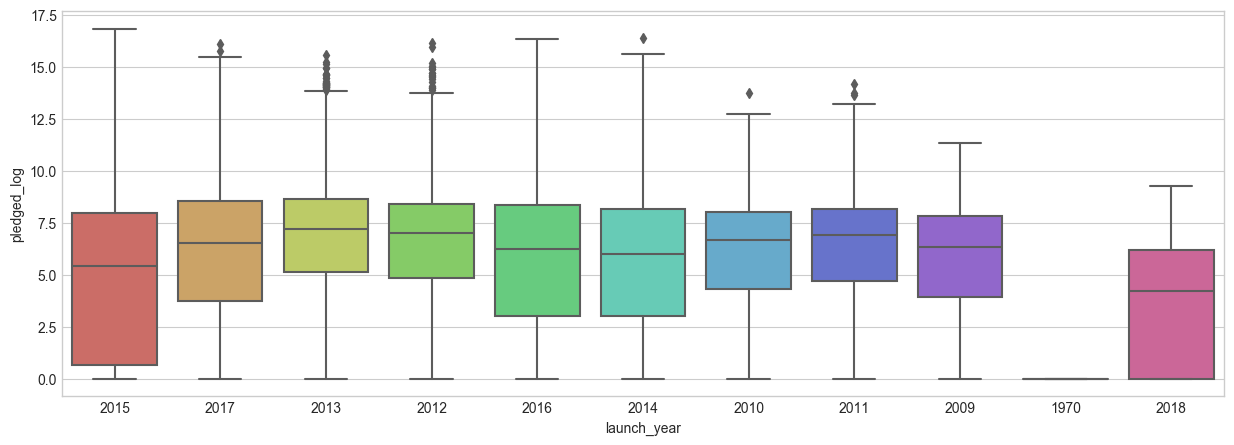

In [194]:
sns.boxplot(x="launch_year", y="pledged_log", 
                     data=projects_2017, palette="hls")
#forzar order que se quiere

## Analizando Backers

In [200]:
projects_2017["backers_log"] = np.log(projects_2017["backers"]+1)

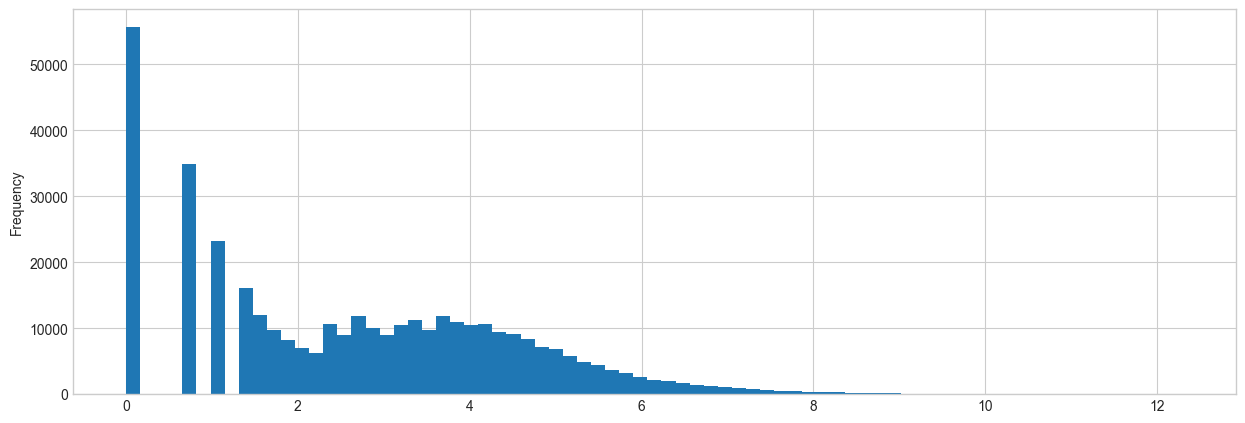

In [205]:
projects_2017["backers_log"].plot.hist(bins=75)

/Users/ak/code/datos-exploratory-data-analysis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Backers Log Distribution')

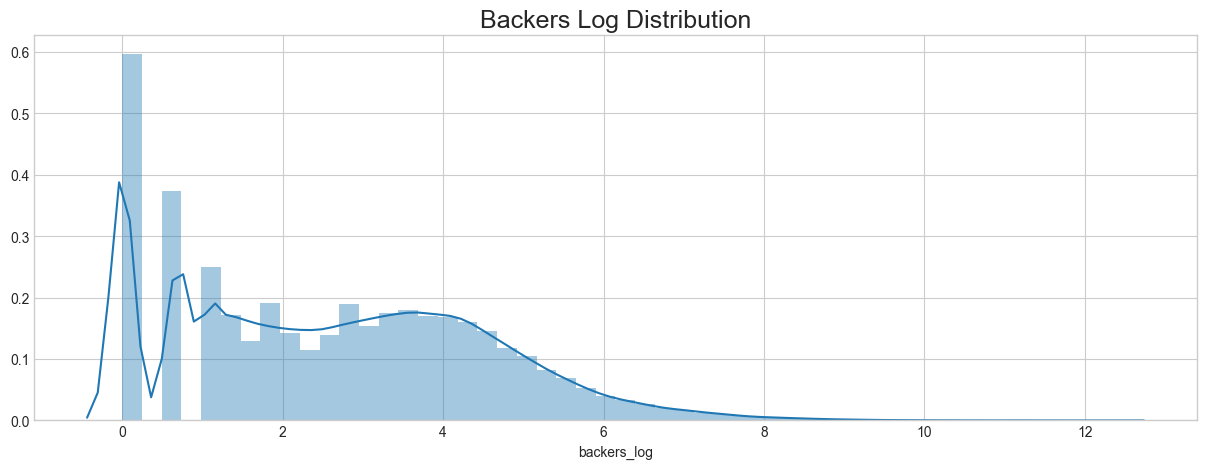

In [204]:
g = sns.distplot(projects_2017["backers_log"])
g.set_title("Backers Log Distribution", fontsize=18)

In [ ]:
# armar esto con merge de ambos
g = sns.lmplot(x="pledge_log", y="backers_log", 
                    data=projects_2017, hue='state')

g.set_xlabel("Pledged Values(log)")
g.set_ylabel("Backers(log)")

## Analizando Goal por periodo de tiempo

In [215]:
#for_heatmap = projects_2017.pivot(index='launch_year', columns='launch_month', values='goal')

In [216]:
#g = sns.heatmap(for_heatmap)

## Concatenacion Join y Merge

In [218]:
# TODO hacer success y failed para analisis con concat
# mostrar inconsistencias de datos con el otro set de datos y mostrar como hacer el concat
# mostrar los scenarios simples de join.